In [1]:
%load_ext autoreload
%autoreload
from tracking import visualise_tracks, track,consolidate_indices, iou_track
from utils import verify_ID_uniqueness, visualise_image, visualise_masks
from make_gaussians import add_centroids,make_gaussian_masks, visualise_gaussians
from make_dataset import make_dataset
from resize_data import resize_data, scale_data
from discard import score_and_pos_discard, class_and_size_discard
import h5py
import os
ROOT_DIR = os.path.abspath("../")
import numpy as np

In [2]:
# Path to the processed and raw folders in the data
PROCESSED_PATH = os.path.join(ROOT_DIR, "../data/processed/")
RAW_PATH = os.path.join(ROOT_DIR, "../data/raw/")

name = "football1_sm5"


data_file = os.path.join(PROCESSED_PATH, "{}/{}.hdf5".format(name,name))
class_filtered_file = os.path.join(PROCESSED_PATH, "{}/{}_cls_filtered.hdf5".format(name,name))

tracked_file = os.path.join(PROCESSED_PATH, "{}/{}_tracked.hdf5".format(name,name))
tracked_file_c = os.path.join(PROCESSED_PATH, "{}/{}_tracked_c.hdf5".format(name,name))
resized_file = os.path.join(PROCESSED_PATH, "{}/{}_resized.hdf5".format(name,name))
dataset_file = os.path.join(PROCESSED_PATH, "{}/{}_dataset.hdf5".format(name,name))
target_folder = os.path.join(PROCESSED_PATH, "{}/mask_images/".format(name))
target_folder_consolidated = os.path.join(PROCESSED_PATH, "{}/tracked_images_consolidated/".format(name))
target_folder_gauss = os.path.join(PROCESSED_PATH, "{}/tracked_images_gauss/".format(name))

In [3]:
class_and_size_discard(data_file,class_filtered_file,masks_to_keep = ['person'],)

In [4]:
score_and_pos_discard(class_filtered_file,tracked_file,[('person', 0.995)])

In [5]:
iou_track(tracked_file)

In [16]:
track(tracked_file)

In [17]:
track(tracked_file, reverse=True)

In [18]:
consolidate_indices(tracked_file)

In [6]:
resize_data(tracked_file, resized_file,256,314)

In [7]:
make_gaussian_masks(resized_file,verbose=0)

In [28]:
visualise_gaussians(resized_file,target_folder_gauss,captions = True)

In [21]:
visualise_tracks(resized_file, target_folder_consolidated , id_idx = 0)

In [8]:
make_dataset(resized_file, dataset_file)

In [9]:
f = h5py.File(dataset_file, "r")

In [10]:
len(list(f.keys()))

200

In [45]:
f['datapoint0']['origin_frame'].value

array([0])

In [48]:
f['datapoint1']['centroids'].value

array([[ 54, 206],
       [ 52, 206],
       [ 50, 205]])

In [145]:
f['datapoint0']['future_mask'].shape

(182, 314)

In [146]:
f['datapoint0']['gaussian_mask'].shape

(182, 314)

In [147]:
f['datapoint0']['images'].shape

(182, 314, 3, 3)

In [148]:
f['datapoint0']['mask_id'].value

array([ 1.], dtype=float32)

In [149]:
f['datapoint0']['origin_frame'].shape

(1,)

In [150]:
f['datapoint0']['masks'].shape

(182, 314, 3)

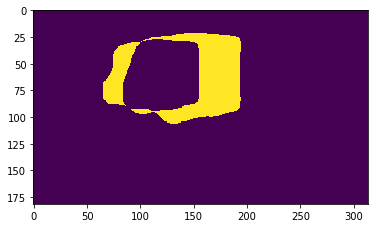

In [17]:
visualise_image(f['datapoint0']['delta_masks'].value[:,:,1])

In [35]:
a = f['datapoint0']['masks'].value

In [28]:
b =f['datapoint1']['masks'].value

In [50]:
delta_masks = (a[:,:,2].astype(int)-a[:,:,0].astype(int))

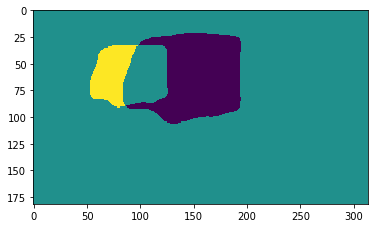

In [51]:
visualise_image(delta_masks)

In [46]:
f2 = h5py.File(resized_file, "r")

In [47]:
f2['frame0']['centroids'].value

array([[ 74,  96],
       [ 54, 206]])

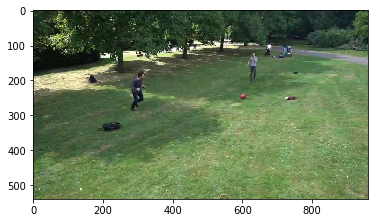

In [54]:
visualise_image(f2['frame1']['image'].value, save_path = os.path.join(PROCESSED_PATH, "{}/{}tets.jpg".format(name,name)) )

In [55]:
f2['frame1']['rois'].value

array([[174, 279, 286, 327],
       [121, 613, 206, 646],
       [186, 161, 210, 188],
       [239, 596, 254, 610],
       [ 96, 667, 132, 685],
       [ 79, 546,  94, 573],
       [244, 721, 259, 756],
       [ 89, 387, 119, 399],
       [318, 198, 345, 255]], dtype=int32)

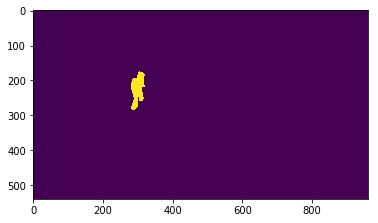

In [58]:
visualise_image(f2['frame1']['masks'].value[:,:,0])

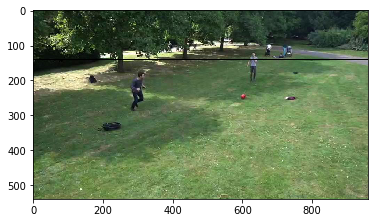

In [47]:
visualise_image(a)


In [11]:
f.close()

In [59]:
f2.close()

In [57]:
f2 = h5py.File(resized_file, "r")

In [58]:
f2['frame1']['image'].shape

(182, 314, 3)

In [60]:
f2['frame1']['centroids'].value


array([[ 63,  39],
       [ 63, 125],
       [ 56,  64],
       [ 57,  79]])

In [71]:
a[150:154,:,:]=0

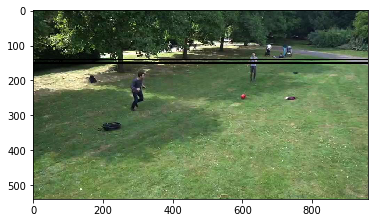

In [72]:
visualise_image(a)

In [66]:
f2.close()